In [ ]:
# Implementasi jaringan syaraf tiruan untuk deteksi gender dan usia seseorang melalui gambar menggunakan convolutional neural network
# Ujian Akhir Semester 
# Intelegensia Buatan
# Mohamad Rasyid Ridho
# 1197050073
# Kelas A

In [ ]:
# Change directory to sample_data folder
%cd sample_data

/content/sample_data


In [ ]:
# Download modelNweight.zip from google drive 
!gdown https://drive.google.com/uc?id=1Mnu3VQ1_YFnNK8pssgBK2N4Pz5-1C2GF

# Extract modelNweight.zip 
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1Mnu3VQ1_YFnNK8pssgBK2N4Pz5-1C2GF
To: /content/sample_data/modelNweight.zip
100% 86.4M/86.4M [00:02<00:00, 33.6MB/s]
Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
   creating: modelNweight/images/
  inflating: modelNweight/images/Mohamad_Rasyid_Ridho.jpg  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [ ]:
# Importing libraries
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

In [ ]:
# Finding bounding box coordinates
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

In [ ]:
# Loading dataset from directory
faceProto = "/content/sample_data/modelNweight/opencv_face_detector.pbtxt"
faceModel = "/content/sample_data/modelNweight/opencv_face_detector_uint8.pb"
ageProto = "/content/sample_data/modelNweight/age_deploy.prototxt"
ageModel = "/content/sample_data/modelNweight/age_net.caffemodel"
genderProto = "/content/sample_data/modelNweight/gender_deploy.prototxt"
genderModel = "/content/sample_data/modelNweight/gender_net.caffemodel"

In [ ]:
# Mentioning age and gender category list
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [ ]:
# Loading network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

In [ ]:
# Function to predict gender and age
def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # Print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]
        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # Print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        # Print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))
        label = "{},{}".format(gender, age)

        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

Gender : Male, conf = 1.000
Age : (8-12), conf = 0.349


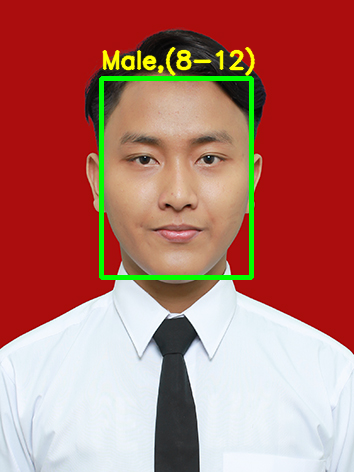

In [ ]:
# Input images
input = cv.imread("/content/sample_data/modelNweight/images/Mohamad_Rasyid_Ridho.jpg")
output = age_gender_detector(input)
cv2_imshow(output)